In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# EDA for Google Play Store App Data

### Reading the Google Play Store Apps Dataset

In [4]:
df = pd.read_csv("google_play.csv")

### Basic information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

### Checking the total amount of null values in each column and sorting them

In [6]:
df.isnull().sum().sort_values(ascending=False)

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  5
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

### Dropping Duplicate Values

In [7]:
df.drop_duplicates()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,...,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,...,http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,...,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,...,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


In [8]:
df.shape

(2312944, 24)

### Most Amount of Downloads by Developer Email

In [9]:
df["Developer Email"].value_counts().sort_values(ascending=False)

Developer Email
support@classplus.co          10345
appsupport@subsplash.com       7570
help@trainerize.com            4886
eng-android@chownow.com        4862
support@mindbodyonline.com     3047
                              ...  
giyimasali@gmail.com              1
info@deltabee.com                 1
info@mashtal.qa                   1
info@hygienewatch.com             1
rachmanaditya5@gmail.com          1
Name: count, Length: 950456, dtype: int64

### Top 10 Installs by App Category

In [10]:
df["Category"].value_counts().sort_values(ascending=False).head(10)

Category
Education            241090
Music & Audio        154906
Tools                143988
Business             143771
Entertainment        138276
Lifestyle            118331
Books & Reference    116728
Personalization       89210
Health & Fitness      83510
Productivity          79698
Name: count, dtype: int64

### All Unique Values in Content Rating

In [11]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

### Sorting the Amount of Apps based on Content Rating

In [12]:
df["Content Rating"].value_counts().sort_values(ascending=False).head(10)

Content Rating
Everyone           2022089
Teen                196375
Mature 17+           60289
Everyone 10+         33901
Unrated                154
Adults only 18+        136
Name: count, dtype: int64

### Plotting a histogram on Amount of apps based on Content Rating

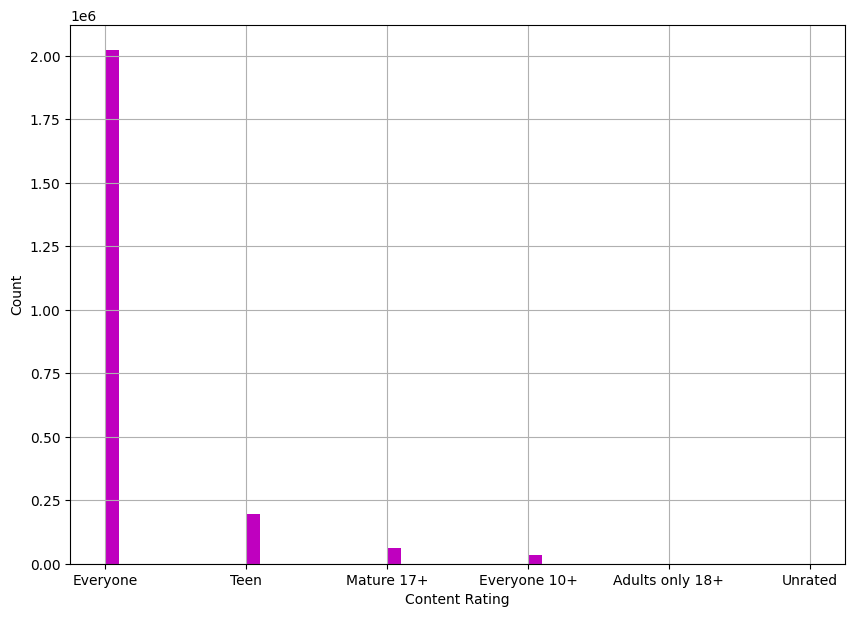

In [13]:
df["Content Rating"].hist(bins=50, color='m', figsize=(10,7))
plt.xlabel("Content Rating")
plt.ylabel("Count")

plt.show()

### Grouping Apps by Content Rating and Category and sorting them based on Maximum number of Installs

In [14]:
df.groupby(['Content Rating', 'Category'])['Maximum Installs'].sum().sort_values(ascending=False)

Content Rating   Category         
Everyone         Tools                116096888084
                 Communication         67800873675
                 Productivity          45068963621
                 Photography           28678888029
Teen             Social                25322267165
                                          ...     
Adults only 18+  Casual                         35
Unrated          Medical                        13
Adults only 18+  Maps & Navigation              10
                 Beauty                          3
                 Events                          2
Name: Maximum Installs, Length: 254, dtype: int64

### Grouping Apps by Last Update date and sorting them based on Maximum number of Installs

In [15]:
df.groupby(['Last Updated'])['Maximum Installs'].sum().sort_values(ascending=False)

Last Updated
Jun 14, 2021    69376047585
Jun 15, 2021    50150251938
Jun 10, 2021    37428247518
Jun 11, 2021    32966320404
Jun 09, 2021    31357164578
                   ...     
Jun 18, 2010             25
Feb 20, 2011             24
Dec 06, 2011             23
Nov 17, 2011             13
Nov 10, 2009              9
Name: Maximum Installs, Length: 3918, dtype: int64

### Grouping Apps by Content Rating and Last Update date and sorting them based on Maximum number of Installs

In [16]:
df.groupby(['Content Rating', 'Last Updated'])['Maximum Installs'].sum().sort_values(ascending=False)

Content Rating   Last Updated
Everyone         Jun 14, 2021    45678500606
                 Jun 15, 2021    34069633607
                 Jun 10, 2021    26236698611
                 Jun 09, 2021    24592748882
                 Jun 11, 2021    23258261942
                                    ...     
Everyone 10+     Feb 24, 2014              1
Adults only 18+  Jun 11, 2021              0
Everyone 10+     May 20, 2017              0
Teen             Apr 02, 2011              0
Everyone 10+     May 23, 2014              0
Name: Maximum Installs, Length: 11907, dtype: int64

Most App Categories Download Yearly

### Grouping Apps by Last Update date and Category and sorting them based on Maximum number of Installs

In [17]:
df.groupby(['Last Updated', 'Category'])['Maximum Installs'].sum().sort_values(ascending=False)

Last Updated  Category        
Jun 14, 2021  Communication       16789105608
Jun 10, 2021  Tools               15372790343
Jun 15, 2021  Travel & Local      12164307087
Jun 11, 2021  Tools               10869291929
Jun 16, 2021  Communication       10594536289
                                     ...     
Jan 06, 2018  Parenting                     0
Oct 01, 2016  Strategy                      0
Aug 09, 2016  Shopping                      0
Dec 01, 2018  Simulation                    0
Feb 04, 2017  Libraries & Demo              0
Name: Maximum Installs, Length: 109550, dtype: int64

In [18]:
df['Rating'].unique()

array([0. , 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, nan, 1.5, 3.5, 2.9, 1.3, 2.8, 3. , 2.2, 1.8, 1.4, 1.2, 1.9,
       1.7, 1.6, 1. , 1.1])

In [19]:
df['Category'].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

### Selecting some specific values for the Category Column

In [20]:
df2 = df[df['Category'].isin(['Tools', 'Beauty', 'Social'])]

### Plotting a Pie Chart for showing proprtion of Rating count among the three selected categories

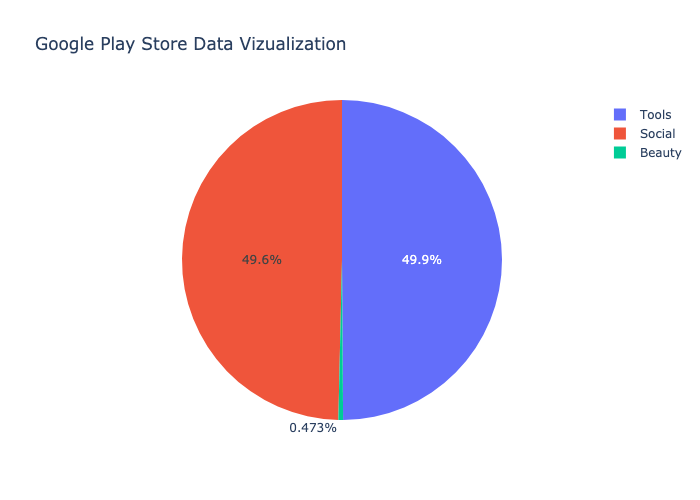

In [21]:
fig1 = px.pie(df2, values='Rating Count', names='Category', title = 'Google Play Store Data Vizualization')
fig1.show('png')